<a href="https://colab.research.google.com/github/Karina0162003/MLP_Programs/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [47]:
df = pd.read_csv("/content/data (1).csv")
df.head(3)

,Name,Age,Income
0,Sophia,26,42000
1,John,39,88000
2,John,36,95000


In [48]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,n_init=10)
km


KMeans(n_clusters=3, n_init=10)

In [52]:
km.fit(df[['Age','Income']])
y_pred=km.predict([[30,"50000"]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [53]:
df.isna().sum()

Name      0
Age       0
Income    0
dtype: int64

In [59]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc

MinMaxScaler()

In [62]:
sc.fit(df[['Age']])
df['Age']=sc.transform(df[['Age']])
sc.fit(df[['Income']])
df['Income']=sc.transform(df[['Income']])


In [66]:
df.head(3)

,Name,Age,Income
0,Sophia,0.153846,0.179104
1,John,0.487179,0.865672
2,John,0.410256,0.970149


In [69]:
y_pred = km.predict(df[['Age','Income']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [70]:
df['cluster']=y_pred

In [71]:
km.cluster_centers_

array([[4.19285714e+01, 9.04285714e+04],
       [4.34705882e+01, 4.08235294e+04],
       [3.93157895e+01, 7.23684211e+04]])

In [72]:
import matplotlib.pyplot as plt


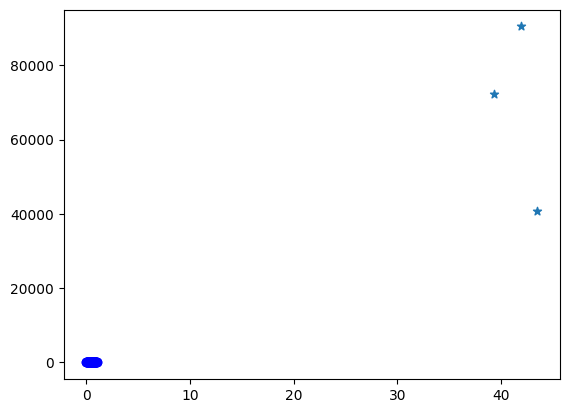

In [82]:
d1=df[df.cluster==0]
d2=df[df.cluster==1]
plt.scatter(d1['Age'],d1['Income'],color="r")
plt.scatter(d2['Age'],df['Income'],color="b")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label="Centroid",marker="*")
plt.show()

In [89]:
ssr=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  ssr.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

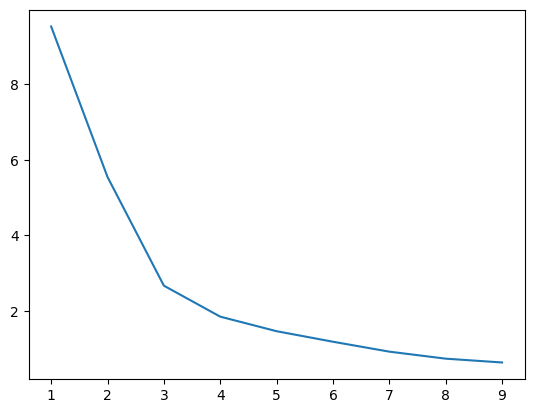

In [91]:
plt.plot(k_rng,ssr)